In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader

In [2]:
file = './HadISST_sst.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']
time = dataset.variables['time']
sst =dataset.variables['sst']

In [3]:
# 时间 1982年到1997年共计 16年 总共192个月
# time[:].data[1343:1548] % 365
# 时间  1998年到2021年 共计24年总共288个月
# time[:].data[1547:1835] % 365

sum_month = np.zeros(sst[:1].data.shape, dtype=float, order='C') # 创建空矩阵
num_month = time[:].data.shape[0] # 创建空时间矩阵
num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的192月数
num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的288月数

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_1982to1997 = sum_month
count = 0
ls_first = []
mean_1982to1997 = sum_month
for i in range(1343, 1343+num_month_1997to1982): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1982to1997 += temp_pre
    count += 1
mean_1982to1997 = sum_month_1982to1997 / num_month_1997to1982

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_1998to2021 = sum_month
count = 0
ls_first = []
mean_1998to2021 = sum_month
for i in range(1547, 1547+num_month_2021to1998): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1998to2021 += temp_pre
    count += 1
mean_1998to2021 = sum_month_1998to2021 / num_month_2021to1998

diff = mean_1998to2021 - mean_1982to1997

/home/lk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


AttributeError: 'numpy.ndarray' object has no attribute 'get_array'

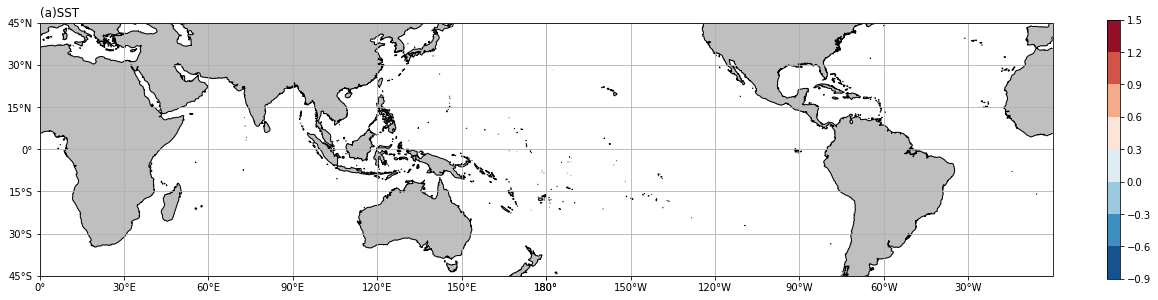

In [75]:
import matplotlib as mpl
lon = longitude[:].data
lat = latitude[44:136].data

lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据

fig = plt.figure(figsize=(15,5))
proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (-180,181, -45,45)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
fig_ax1.grid()



fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

# data = np.zeros((92, 360))
# data[:,179:180] = diff[:,177:178]
# cycle_data, cycle_lon = add_cyclic_point(diff, coord=lon)
# fig_ax1.contourf(cycle_lon, lat, cycle_data,zorder=0,extend = 'both', 
# #                     transform=ccrs.PlateCarree()
#                  cmap=plt.cm.RdBu_r
#                 )

fig_ax1.set_title('(a)SST',loc='left',fontsize =12)
# fig_ax1.contourf(lon, lat, diff, 
#                 levels=bins, 
# #                 color=['blue','red','yellow','black'],
# #                 hatches='///',
#                 transform=cartopy.crs.PlateCarree(),
#                cmap=plt.cm.RdBu_r)

# cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
# #                         levels=np.arange(-1.25,1.25,0.125),
#                         ha = 'center',
#                         zorder=0,
#                         transform=ccrs.PlateCarree(),
#                         cmap=plt.cm.RdBu_r)


# # fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

cbar = plt.colorbar(cont,
                    boundaries=np.arange(-1.25,1.25,0.125),
                    values = np.arange(-1.25,1.25,0.125),
                    fraction=0.012)


cmap = plt.cm.RdBu_r
bounds = np.arange(-1.25,1.25, 0.125)
vals = bounds[:-1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cbar = fig.colorbar(lon_pacific, lat, diff_pacific_contre, 
                     boundaries=bounds, values=vals)
cbar.set_ticks(vals + .5)
cbar.set_ticklabels(np.arange(-1.25,1.25,0.125).tolist())



plt.savefig("HadISST_sst.png",dpi=300,bbox_inches='tight')
plt.show()

In [76]:
for i, j in enumerate(np.arange(-1.25,1.25,0.125)):
    print(i,j)

In [77]:
np.arange(-1.25,1.25, 0.125)

array([-1.25 , -1.125, -1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375,
       -0.25 , -0.125,  0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,
        0.75 ,  0.875,  1.   ,  1.125])

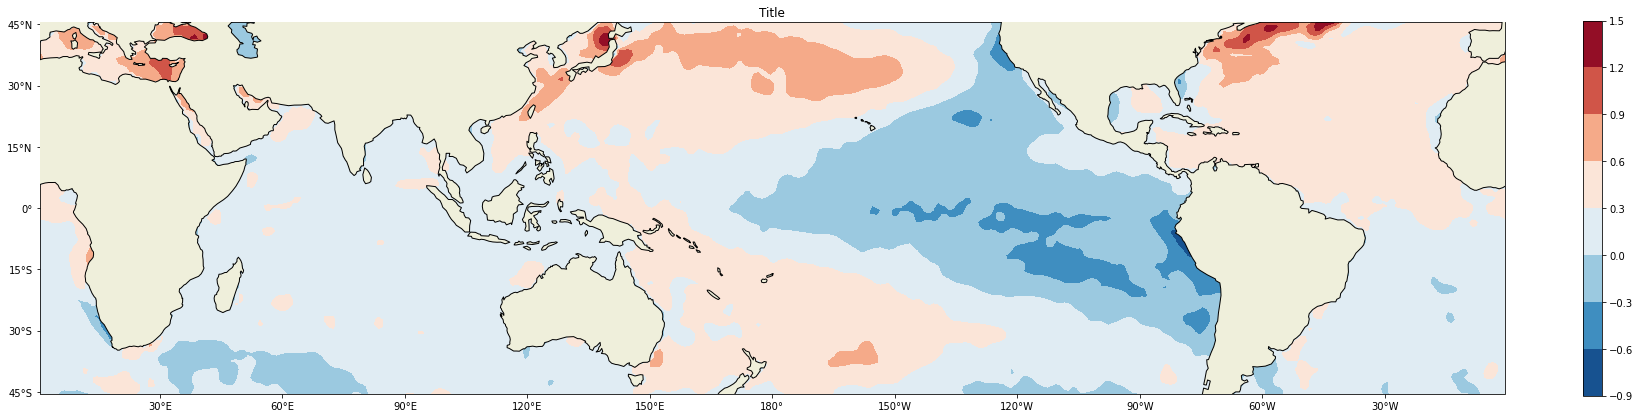

In [19]:
from cartopy.util import add_cyclic_point

lon = longitude[:].data
lat = latitude[44:136].data

lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据


fig = plt.figure(figsize=[28, 12],
#                  edgecolor='black'
                )

ax = plt.axes( projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.LAND, zorder=100,
               edgecolor='k',
#                color='grey'
              )
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

land = cfeature.NaturalEarthFeature('physical','land','50m',
                                    edgecolor='face', 
                                    facecolor=cfeature.COLORS['land'])
ax.add_feature(land,facecolor='0.75')
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.set_xticks(np.arange(0,361,30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())


lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# bins = [-0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9, 1.2]
# nbins = len(bins) -1
m = ax.contourf(lon_pacific, lat, diff_pacific_contre, 
#                 levels=bins, 
#                 color=['blue','red','yellow','black'],
#                 hatches='///',
                transform=cartopy.crs.PlateCarree(),
               cmap=plt.cm.RdBu_r)

# n = ax.contourf(lon, lat, diff,
#                 levels=[0,0.05,1], 
#                 zorder=1, 
#                 hatches=['///',None],
#                 colors="none", transform=ccrs.PlateCarree())
plt.colorbar(m, fraction=0.012)
plt.title("Title")



plt.savefig("HadISST_sst_2.png",dpi=300,bbox_inches='tight')



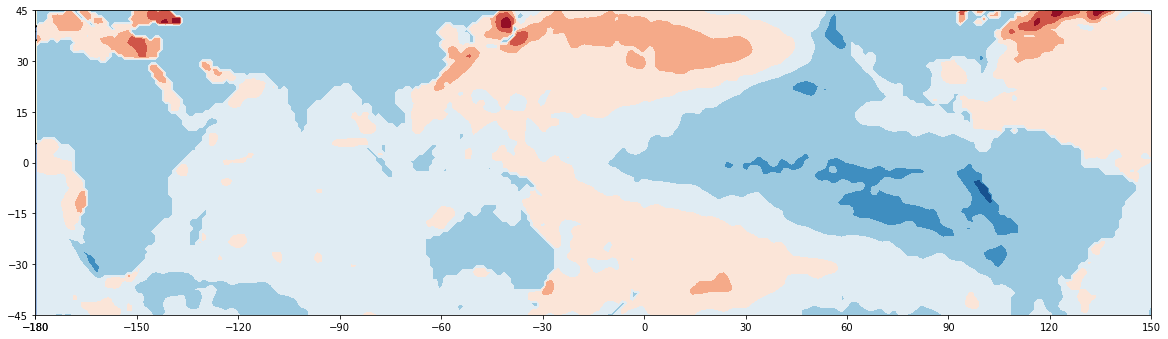

In [16]:
lon = longitude[:].data
lat = latitude[44:136].data

lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据

fig=plt.figure(figsize=(20,15))#设置一个画板，将其返还给fig
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
extent = [-180, 180, 45, -45]
ax.set_extent(extent)

ax.coastlines()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')#边缘为黑色
ax.add_feature(cfeature.RIVERS)

ax.set_xticks(np.arange(0,361,30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())

ax.contourf(lon_pacific, lat, diff_pacific_contre, 
#                 levels=bins, 
#                 color=['blue','red','yellow','black'],
#                 hatches='///',
                transform=cartopy.crs.PlateCarree(),
               cmap=plt.cm.RdBu_r)

In [17]:


mean_1998to2021

array([[ 8.80866063,  8.83502856,  8.84763953, ...,  8.66165742,
         8.71734519,  8.76491896],
       [ 9.77979949,  9.79138941,  9.78705722, ...,  9.64849345,
         9.70064917,  9.74182712],
       [10.8747982 , 10.86977835, 10.8487504 , ..., 10.76396344,
        10.8165319 , 10.84970901],
       ...,
       [13.6866259 , 13.79870783, 13.91966   , ..., 13.35578616,
        13.46329481, 13.57147626],
       [12.67048119, 12.83395791, 13.03611446, ..., 12.34950459,
        12.42708472, 12.53268692],
       [11.85574155, 12.04503816, 12.28978944, ..., 11.53015736,
        11.60306689, 11.70813219]])

In [8]:
diff.min()

-0.7882674833138807

In [34]:
diff.max()

1.4694597903225155